# Proyecto Y.Afisha

## Inroduccion

 - Lo que tienes:
    - registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
    - un archivo con los pedidos en este periodo;
    - estadísticas de gastos de marketing.
    
 - Lo que vas a investigar:
    - cómo los clientes usan el servicio;
    - cuándo empiezan a comprar;
    - cuánto dinero aporta cada cliente a la compañía;
    - cuándo los ingresos cubren el costo de adquisición de los clientes.

## Descargar los datos y prepáralos para el análisis

### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargar DataFrames

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

#### Analisis de DataFrames

In [3]:
visits.info()
print('-------------------')
orders.info()
print('-------------------')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
-

In [4]:
display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
print(visits.isnull().sum())
print('-------------------')
print(orders.isnull().sum())
print('-------------------')
print(costs.isnull().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
-------------------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
-------------------
source_id    0
dt           0
costs        0
dtype: int64


In [6]:
print('Hay', visits.duplicated().sum(), 'filas duplicadas en la tabla visits')
print('Hay', orders.duplicated().sum(), 'filas duplicadas en la tabla orders')
print('Hay', costs.duplicated().sum(), 'filas duplicadas en la tabla costs')

Hay 0 filas duplicadas en la tabla visits
Hay 0 filas duplicadas en la tabla orders
Hay 0 filas duplicadas en la tabla costs


In [7]:
print(visits.nunique())
print('-------------------')
print(orders.nunique())
print('-------------------')
print(costs.nunique())

Device            2
End Ts       224760
Source Id         9
Start Ts     224303
Uid          228169
dtype: int64
-------------------
Buy Ts     45991
Revenue     1149
Uid        36523
dtype: int64
-------------------
source_id       7
dt            364
costs        2396
dtype: int64


### Optimizar datos

In [8]:
visits = pd.read_csv('/datasets/visits_log_us.csv',
                        dtype={'Device': 'category'},
                        parse_dates=['End Ts', 'Start Ts']
                        ).rename(columns={'Device': 'device',
                                        'End Ts': 'end_ts',
                                        'Source Id': 'source_id',
                                        'Start Ts': 'start_ts',
                                        'Uid': 'uid'})

orders = pd.read_csv('/datasets/orders_log_us.csv',
                        parse_dates=['Buy Ts']
                        ).rename(columns={'Buy Ts': 'buy_ts',
                                        'Revenue': 'revenue',
                                        'Uid': 'uid'})

costs = pd.read_csv('/datasets/costs_us.csv',
                        parse_dates=['dt']
                        ).rename(columns={'dt': 'date'})

In [9]:
visits.info()
print('-------------------')
orders.info()
print('-------------------')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
-------------------
<class 'pandas.core.frame.Dat

## Resumen del analisis y optimizacion de los datos

### DataFrame visits
  - La tabla visits podemos ver que se tienen `5 columnas`.
    - `Uid`: es la clave primaria en este caso nos muestra el identificador unico del usuario.
    - `Device`: dispositivo que usan para ingresar a la plataforma.
      - `touch`: dispositivos moviles o tablets.
      - `desktop`: dispositivos de escritorio como PC o Laptop.
    - `Start Ts`: fecha y hora de inicio de la sesion de los usuarios.
    - `End Ts`: fecha y hora de termino de l sesion de los usuarios.
    - `Source Id`: identificador de la fuente de la que proviene el usuario y la podemos tomar como clave foranea.

### DataFrame orders
  - La tabla orders podemos ver que tiene `3 columnas`.
    - `Uid`: identificador unico del usuario, columna que comparte con la tabla visits.
    - `Buy Ts`: fecha y hora en que se realizo el pedido.
    - `Revenue`: ingreso del pedido

### DataFrame costs
  - La tabla costs tiene `3 columnas`.
    - `Source Id`: identificador de la fuente de donde proviene el usuario.
    - `dt`: fecha de compra.
    - `costs`: gasto de la adquisicion.

### Analisis de los DataFrame

Podemos ver que los DataFrames comparten columnas para asi poder hacer un merge mas adelante. La columna `Source Id` de las tablas visits y costs tienen una diferencia: en la tabla visits podemos ver que hay `9 valores unicos` mientras que en la tabla costs tiene `7 valores unicos`, esto me indica 2 posibles situaciones, que exista un error en la tabla costs o que hay fuentes por la cuales no se pago alguna catindad, por ejemplo, por medio de alguna recomendacion de otro usuario o por medio de un motor de busqueda: mas adelante analizaremos que posibilidades puede ser.

## Informes y metricas de las visitas

### ¿Cuántas personas lo usan cada día, semana y mes?

In [10]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


In [11]:
visits['date'] = pd.DatetimeIndex(visits['start_ts']).date
visits['week'] = pd.to_datetime(visits['start_ts']).dt.to_period('W')
visits['month'] = pd.to_datetime(visits['start_ts']).dt.to_period('M')
visits['year'] = pd.DatetimeIndex(visits['start_ts']).year

visits.head(2)

,device,end_ts,source_id,start_ts,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018


In [12]:
date_visits_unique = visits.pivot_table(index='date', values='uid', aggfunc=lambda x: len(x.unique()))
date_visits_unique.head()

,uid
date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


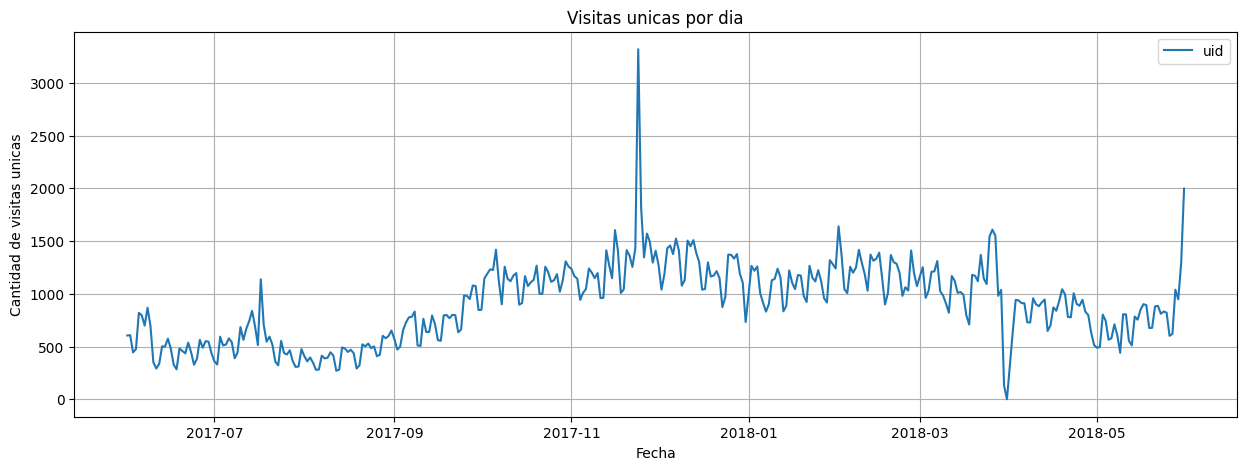

In [13]:
date_visits_unique.plot(figsize=(15, 5), grid=True)
plt.title('Visitas unicas por dia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de visitas unicas')
plt.show()

#### Conclusión

Aquí podemos ver el aumento y la caída de los usuarios únicos diarios. El número crecía cada vez más desde mediados de 2017 hasta finales de 2017, pero luego comenzó a debilitarse.
    
En general, parece haber una disminución desde su pico en diciembre de 2017. Esa caída dramática puede explicarse tal vez por una caída del servidor o un mantenimiento programado. Investigaré más a fondo el pico de noviembre.

Minimo de visitas unicas por dia: 1
Maximo de visitas unicas por dia: 3319
Promedio de visitas unicas por dia: 907.99
Mediana de visitas unicas por dia: 921.0
Desviacion estandar de visitas unicas por dia: 370.51


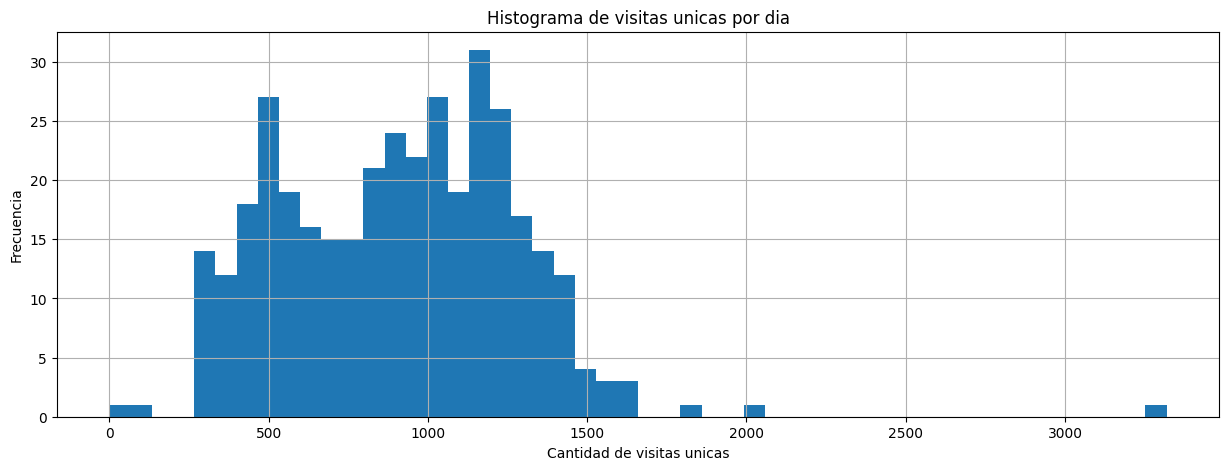

In [14]:
date_visits_unique.reset_index(inplace=True)

print('Minimo de visitas unicas por dia:', date_visits_unique['uid'].min())
print('Maximo de visitas unicas por dia:', date_visits_unique['uid'].max())
print('Promedio de visitas unicas por dia: {:.2f}'.format(date_visits_unique['uid'].mean()))
print('Mediana de visitas unicas por dia:', date_visits_unique['uid'].median())
print('Desviacion estandar de visitas unicas por dia: {:.2f}'.format(date_visits_unique['uid'].std()))

date_visits_unique['uid'].hist(bins=50, figsize=(15, 5))
plt.title('Histograma de visitas unicas por dia')
plt.xlabel('Cantidad de visitas unicas')
plt.ylabel('Frecuencia')
plt.show()

#### Conclusiones del histograma

Aquí podemos ver que el número mínimo de usuarios únicos diarios ha sido de 1, y el máximo de 3,319.
    
El promedio es de 908, pero la mediana es de 921.
    
En el histograma podemos ver que la mayoría de los días tienen entre 400 y 1400 usuarios únicos, lo que indica una gran dispersión.

### ¿Cuántas personas lo usan cada semana?

In [15]:
week_visits_unique = visits.pivot_table(index='week', values='uid', aggfunc=lambda x: len(x.unique()))
week_visits_unique.head(5)

,uid
week,
2017-05-29/2017-06-04,2021
2017-06-05/2017-06-11,4129
2017-06-12/2017-06-18,2812
2017-06-19/2017-06-25,2878
2017-06-26/2017-07-02,3064


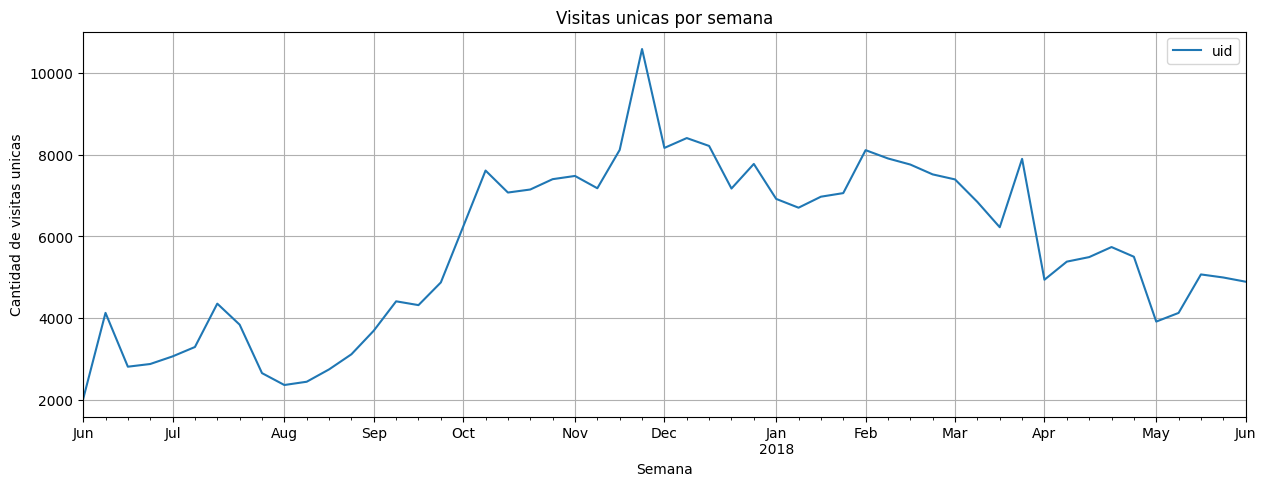

In [16]:
week_visits_unique.plot(figsize=(15, 5), grid=True)
plt.title('Visitas unicas por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de visitas unicas')
plt.show()

In [17]:
print('Minimo de visitas unicas por semana:', week_visits_unique['uid'].min())
print('Maximo de visitas unicas por semana:', week_visits_unique['uid'].max())
print('Promedio de visitas unicas por semana: {:.2f}'.format(week_visits_unique['uid'].mean()))
print('Mediana de visitas unicas por semana:', week_visits_unique['uid'].median())
print('Desviacion estandar de visitas unicas por semana: {:.2f}'.format(week_visits_unique['uid'].std()))

Minimo de visitas unicas por semana: 2021
Maximo de visitas unicas por semana: 10586
Promedio de visitas unicas por semana: 5716.25
Mediana de visitas unicas por semana: 5740.0
Desviacion estandar de visitas unicas por semana: 2049.90


#### Conclusión

Aquí vemos una historia similar a la de los usuarios diarios en cuanto a la tendencia general. Hubo un aumento constante hasta finales de 2017, pero luego una disminución gradual en 2018. Sin embargo, a nivel semanal, vemos que hay una mayor desviación, con una desviación estándar de 2,049. Las semanas máximas alcanzaron un pico de 10,586, mientras que las semanas mínimas llegaron a 2,021. La media y la mediana fueron muy cercanas, alrededor de 5,700, lo que implica una baja sesgo.

### ¿Cuántas personas lo usan cada mensual?

In [18]:
month_visits_unique = visits.pivot_table(index='month', values='uid', aggfunc=lambda x: len(x.unique()))
month_visits_unique.head(5)

,uid
month,
2017-06,13259
2017-07,14183
2017-08,11631
2017-09,18975
2017-10,29692


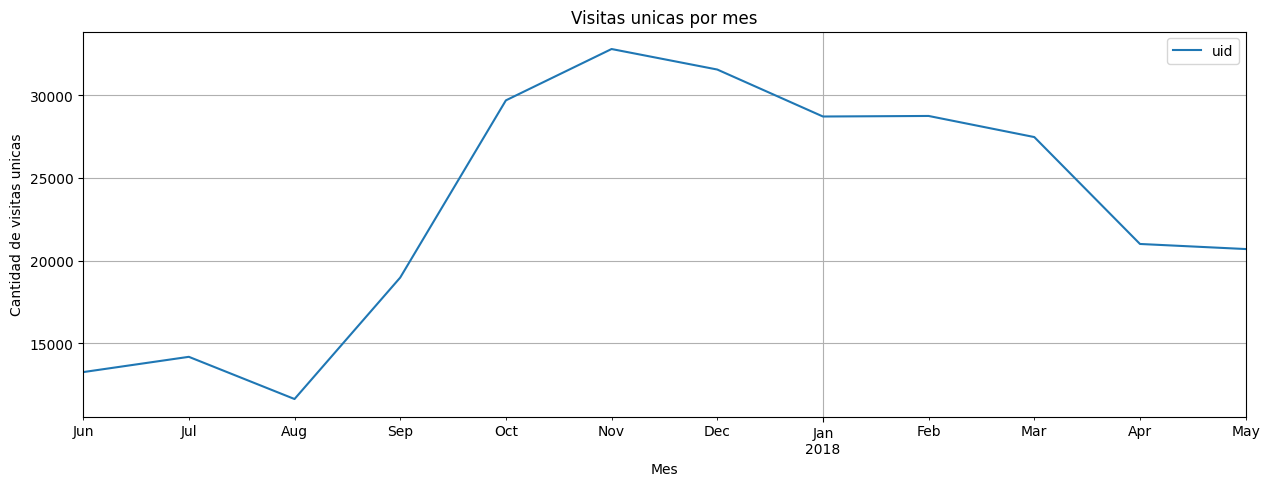

In [19]:
month_visits_unique.plot(figsize=(15, 5), grid=True)
plt.title('Visitas unicas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de visitas unicas')
plt.show()

In [20]:
print('Minimo de visitas unicas por mes:', month_visits_unique['uid'].min())
print('Maximo de visitas unicas por mes:', month_visits_unique['uid'].max())
print('Promedio de visitas unicas por mes: {:.2f}'.format(month_visits_unique['uid'].mean()))
print('Mediana de visitas unicas por mes:', month_visits_unique['uid'].median())
print('Desviacion estandar de visitas unicas por mes: {:.2f}'.format(month_visits_unique['uid'].std()))

Minimo de visitas unicas por mes: 11631
Maximo de visitas unicas por mes: 32797
Promedio de visitas unicas por mes: 23228.42
Mediana de visitas unicas por mes: 24240.5
Desviacion estandar de visitas unicas por mes: 7546.38


#### Conclusión

La gráfica mensual muestra una visión más dramática de la tendencia global, con un aumento en 2017 y una caída en 2018. El peor mes fue agosto de 2017 con 11,631, mientras que el mejor fue noviembre con 32,797 - lo que es lógico, ya que incluyó el destacado Día de los Descuentos (Black Friday). La desviación de un mes a otro es aún más grande aquí, con 7,546. La media y la mediana vuelven a estar cerca, entre aproximadamente 23,000 y 24,000.

### Métricas de usuario

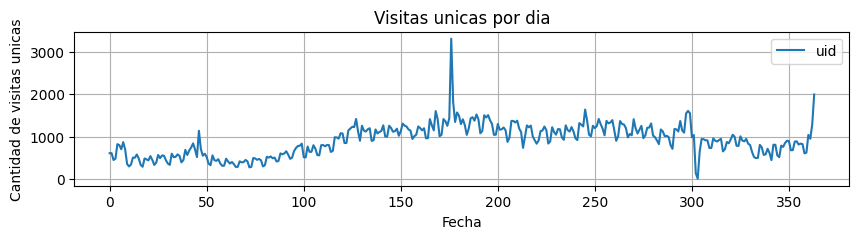

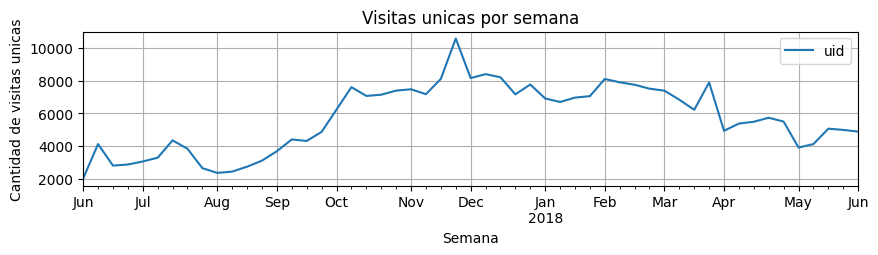

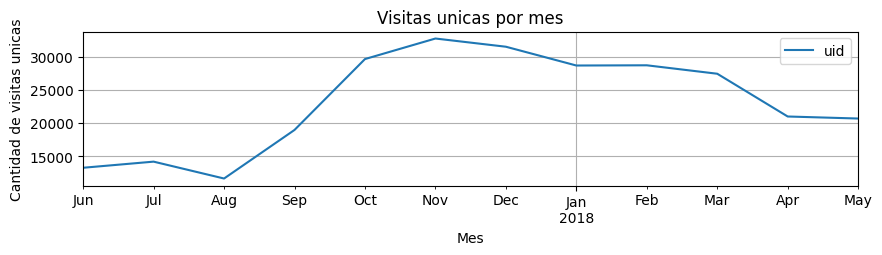

In [21]:
date_visits_unique.plot(figsize=(10, 2), grid=True)
plt.title('Visitas unicas por dia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de visitas unicas')

week_visits_unique.plot(figsize=(10, 2), grid=True)
plt.title('Visitas unicas por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad de visitas unicas')

month_visits_unique.plot(figsize=(10, 2), grid=True)
plt.title('Visitas unicas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de visitas unicas')

plt.show()

#### Conclusión

El DAU nos brinda una buena imagen de la variación entre días, el WAU hace lo mismo para las semanas, mientras que el MAU muestra mejor la tendencia general - aumentando en 2017 y disminuyendo a lo largo de 2018.

## ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [22]:
sessions_per_user = visits.groupby('date').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.head()

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


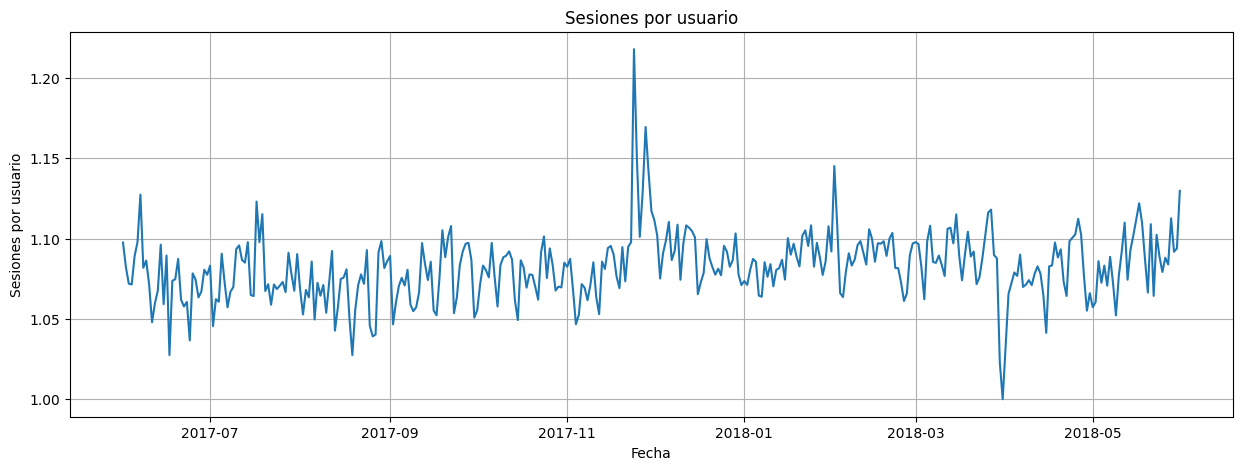

In [23]:
sessions_per_user['sessions_per_user'].plot(figsize=(15, 5), grid=True)
plt.title('Sesiones por usuario')
plt.xlabel('Fecha')
plt.ylabel('Sesiones por usuario')
plt.show()

In [24]:
print('Promedio de sesiones por usuario:', sessions_per_user['sessions_per_user'].mean())
print('Mediana de sesiones por usuario:', sessions_per_user['sessions_per_user'].median())

Promedio de sesiones por usuario: 1.082169644003972
Mediana de sesiones por usuario: 1.0824875552419868


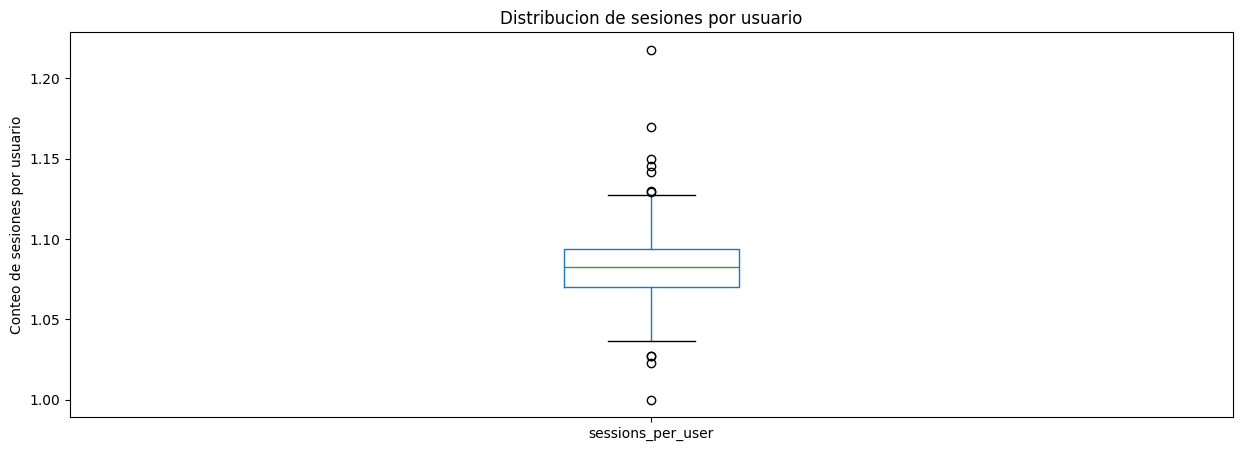

In [25]:
sessions_per_user['sessions_per_user'].plot.box(figsize=(15, 5))
plt.title('Distribucion de sesiones por usuario')
plt.ylabel('Conteo de sesiones por usuario')
plt.show()

#### Conclusión

Entre estos dos gráficos y las medias y medianas, se puede ver que las sesiones por día no se desvían realmente de 1

## ¿Cuál es la duración de cada sesión?

In [26]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0


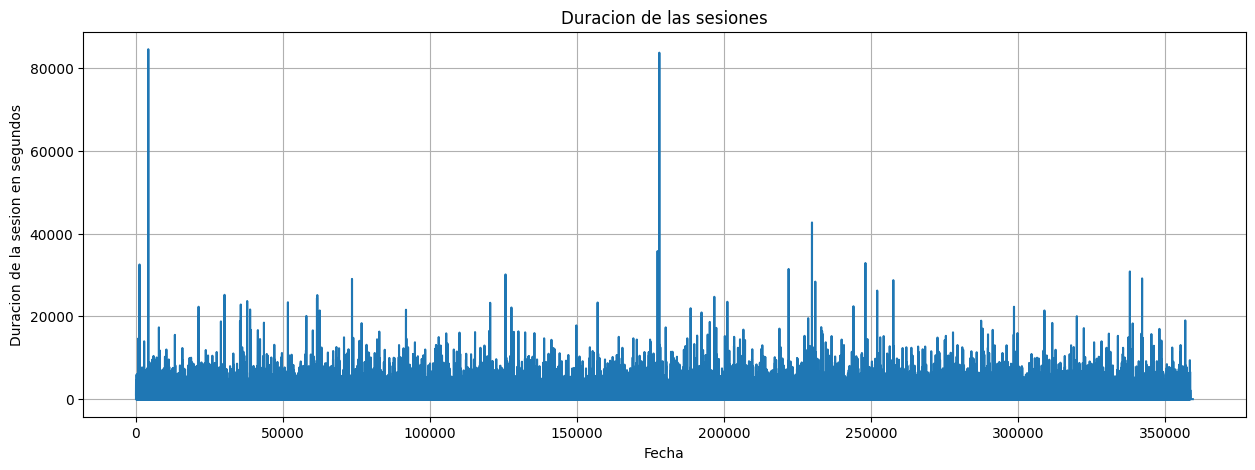

In [27]:
visits['session_duration_sec'].plot(figsize=(15, 5), grid=True)
plt.title('Duracion de las sesiones')
plt.xlabel('Fecha')
plt.ylabel('Duracion de la sesion en segundos')
plt.show()

In [28]:
print('Minimo de duracion de sesion en segundos:', visits['session_duration_sec'].min())
print('Maximo de duracion de sesion en segundos:', visits['session_duration_sec'].max())
print('Promedio de duracion de sesion en segundos: {:.2f}'.format(visits['session_duration_sec'].mean()))
print('Mediana de duracion de sesion en segundos:', visits['session_duration_sec'].median())
print('Desviacion estandar de duracion de sesion en segundos: {:.2f}'.format(visits['session_duration_sec'].std()))

Minimo de duracion de sesion en segundos: 0
Maximo de duracion de sesion en segundos: 84480
Promedio de duracion de sesion en segundos: 643.51
Mediana de duracion de sesion en segundos: 300.0
Desviacion estandar de duracion de sesion en segundos: 1016.33


#### Conclusión

Podemos ver en estos datos que la mayoría de las sesiones fluctúan entre 0 y 1000 segundos. Hay muchos valores atípicos, quizás los usuarios cambiaron de pestaña y la dejaron abierta durante horas. Y con sesiones tan cortas de 0 segundos, se puede asumir que quizás el usuario aterrizó por error o abrió nuevamente su navegador solo para navegar hacia otro lugar de inmediato. La sesión promedio dura 643 segundos, y dado que la mediana es solo de 300 segundos, podemos entender la distorsión formada por los valores atípicos

## ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [29]:
min_visits = visits.groupby(['uid'])['start_ts'].min().reset_index()
min_visits.columns = ['uid', 'first_visit']

retention_data = visits.merge(min_visits[['uid', 'first_visit']], on='uid', how='left')

retention_data.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_duration_sec,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0,2017-12-27 14:06:00


In [30]:
retention_data['cohort'] = retention_data['first_visit'].apply(lambda x: x.strftime('%Y-%m'))
retention_data['retention_date'] = ((retention_data['start_ts'] - retention_data['first_visit']) /np.timedelta64(1, 'D')).astype(int)
retention_data_clean = retention_data[retention_data.start_ts != retention_data.first_visit]

retention_data_clean.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_duration_sec,first_visit,cohort,retention_date
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03-09 20:05:00,2018-03,71
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-29/2018-02-04,2018-01,2018,3360,2017-06-29 09:00:00,2017-06,215
11,desktop,2018-01-25 19:41:00,1,2018-01-25 19:37:00,7478054213403174082,2018-01-25,2018-01-22/2018-01-28,2018-01,2018,240,2018-01-25 14:16:00,2018-01,0
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-02-06,2018-02-05/2018-02-11,2018-02,2018,300,2017-06-04 14:17:00,2017-06,247
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018-04-23,2018-04-23/2018-04-29,2018-04,2018,60,2017-10-04 22:44:00,2017-10,200


In [31]:
retention_list = [0, 1, 2, 7, 14, 30]
def retention(retention_day, group_by):
    grouped = (retention_data_clean
               .query('retention_date == @retention_day')
               .groupby(group_by)['uid']
               .nunique()/retention_data_clean.groupby(group_by)['uid'].nunique())*100
    grouped = grouped.reset_index().rename(columns={'uid': 'retention_{}%'.format(retention_day)})
    return grouped

new_retention = []
for i in retention_list:
    new_retention.append(retention(i, 'cohort'))

new_retention = pd.concat(new_retention, axis=1)
new_retention = new_retention.loc[:, ~new_retention.columns.duplicated()]
new_retention.set_index('cohort', inplace=True)
new_retention

,retention_0%,retention_1%,retention_2%,retention_7%,retention_14%,retention_30%
cohort,,,,,,
2017-06,17.732620,5.026738,3.336898,2.331551,2.096257,1.069519
2017-07,18.929942,5.710173,3.718810,1.751440,1.319578,0.743762
2017-08,15.900704,3.790674,2.717209,1.912110,1.274740,0.872191
2017-09,19.627681,4.957507,3.561311,1.902064,2.063942,0.991501
2017-10,23.145275,6.318759,4.259520,2.369535,2.242595,1.198872
2017-11,26.998051,8.674464,5.569479,3.383459,2.520189,0.988583
2017-12,28.342342,7.729730,5.873874,2.882883,1.945946,1.171171
2018-01,28.154258,8.181008,4.904146,2.674989,1.917075,1.003121
2018-02,31.724663,8.585217,5.867412,3.429007,2.235204,1.219202


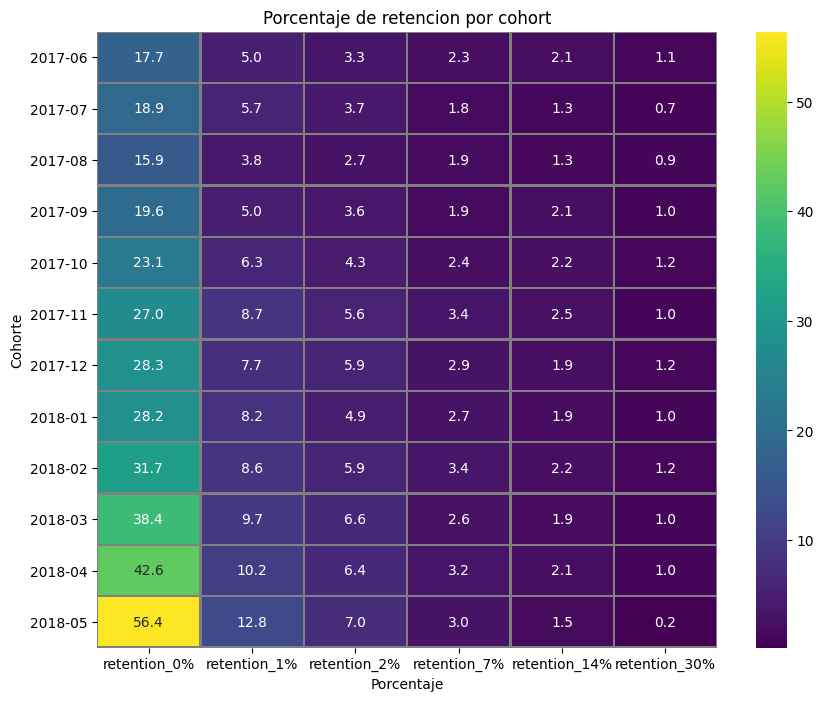

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_retention, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('Porcentaje de retencion por cohort')
plt.xlabel('Porcentaje')
plt.ylabel('Cohorte')
plt.show()

#### Conclusión: 

La retención a largo plazo en el nivel del 30% para cualquier cohorte es bastante baja, alrededor del 1%. Sin embargo, en el bracket del 14% vemos el desempeño más fuerte con la cohorte del 11-17. En cuanto a los brackets anteriores, cada cohorte siguiente a noviembre casi hizo cada vez mejor que la última en los niveles de retención del 0%, 1% y 2%

# Ventas

## ¿Cuándo la gente empieza a comprar?

<div class="alert alert-block alert-secondary">
  <b>En el análisis de KPI</b> <a class="tocSkip"></a>
      
  Generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo
</div>

In [33]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0


In [34]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [35]:
first_session = visits.groupby('uid')['date'].min()
first_session.name = 'first_session_date'

first_session.head()

uid
11863502262781     2018-03-01
49537067089222     2018-02-06
297729379853735    2017-06-07
313578113262317    2017-09-18
325320750514679    2017-09-30
Name: first_session_date, dtype: object

In [36]:
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order_date'
first_order.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

In [37]:
first_session = first_session.reset_index()
first_order = first_order.reset_index()

convertion_users = first_session.merge(first_order, on='uid', how='left')
convertion_users.head()

,uid,first_session_date,first_order_date
0,11863502262781,2018-03-01,NaT
1,49537067089222,2018-02-06,NaT
2,297729379853735,2017-06-07,NaT
3,313578113262317,2017-09-18,2018-01-03 21:51:00
4,325320750514679,2017-09-30,NaT


In [38]:
convertion_users['first_order_date'] = pd.to_datetime(convertion_users['first_order_date']).dt.date
convertion_users['first_session_date'] = pd.to_datetime(convertion_users['first_session_date']).dt.date
convertion_users['days_to_convertion'] = pd.to_datetime(convertion_users['first_order_date']) - pd.to_datetime(convertion_users['first_session_date'])
convertion_users['days_to_convertion'] = convertion_users['days_to_convertion'].dt.days
convertion_users.dropna(inplace=True)

convertion_users.head()

,uid,first_session_date,first_order_date,days_to_convertion
3,313578113262317,2017-09-18,2018-01-03,107.0
22,1575281904278712,2017-06-03,2017-06-03,0.0
35,2429014661409475,2017-10-11,2017-10-11,0.0
36,2464366381792757,2018-01-27,2018-01-28,1.0
38,2551852515556206,2017-11-24,2017-11-24,0.0


In [39]:
def convertion_cohort(days):
    if days == 0:
        return '0d'
    if days >= 1 and days <= 7:
        return '1-7d'
    if days >= 8 and days <= 30:
        return '8-30d'
    if days > 30:
        return '+30d'
    else:
        return 'Other'

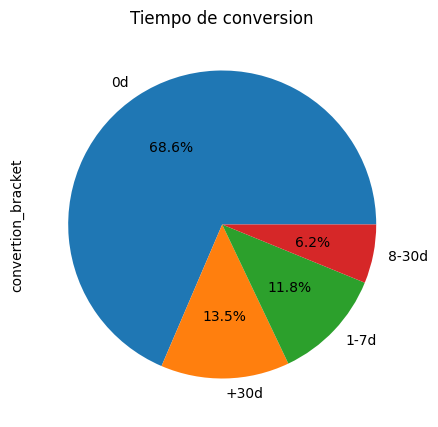

In [40]:
convertion_users['convertion_bracket'] = convertion_users['days_to_convertion'].apply(convertion_cohort)

convertion_users['convertion_bracket'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 5))
plt.title('Tiempo de conversion')
plt.show()

In [41]:
convertion_users['first_session_month'] = pd.to_datetime(convertion_users['first_session_date']).dt.to_period('M')
cohort_convertion = convertion_users.pivot_table(index='first_session_month', columns='convertion_bracket', values='uid', aggfunc='nunique')
cohort_convertion = cohort_convertion.loc[:, ['0d', '1-7d', '8-30d', '+30d']]

cohort_convertion

convertion_bracket,0d,1-7d,8-30d,+30d
first_session_month,,,,
2017-06,1716.0,262.0,149.0,796.0
2017-07,1465.0,232.0,108.0,653.0
2017-08,1059.0,129.0,99.0,434.0
2017-09,1879.0,341.0,226.0,612.0
2017-10,3140.0,520.0,305.0,713.0
2017-11,2706.0,566.0,357.0,633.0
2017-12,2831.0,533.0,248.0,462.0
2018-01,2187.0,412.0,221.0,299.0
2018-02,2360.0,430.0,209.0,187.0


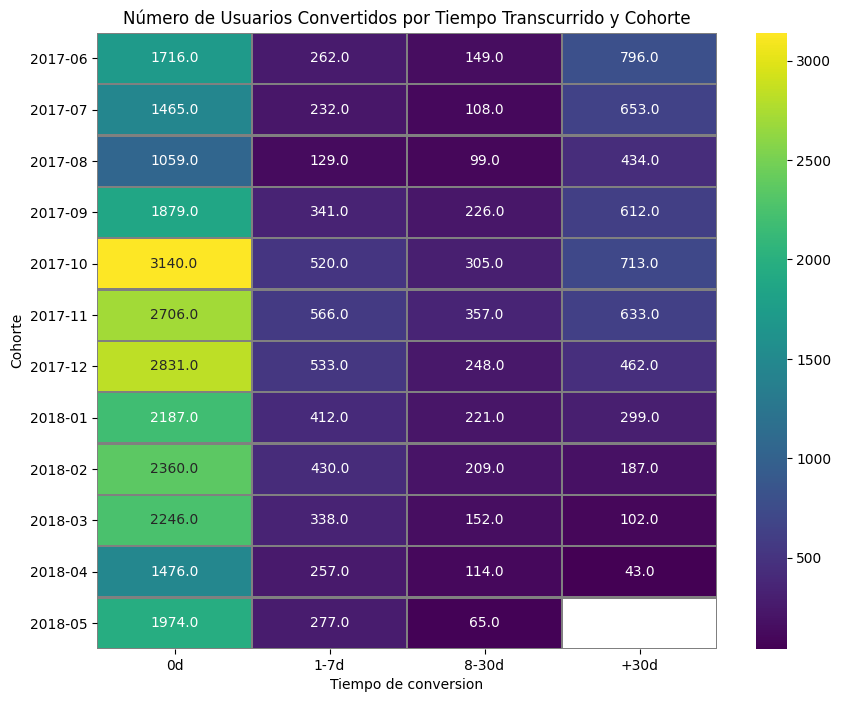

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_convertion, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('Número de Usuarios Convertidos por Tiempo Transcurrido y Cohorte')
plt.xlabel('Tiempo de conversion')
plt.ylabel('Cohorte')
plt.show()

#### Conclusión:

Octubre, Noviembre y Diciembre tuvieron los mejores números de usuarios convertidos el primer día, y continuaron teniendo los números más altos en la primera semana y mes. 
    
Finalmente, hubo muchas conversiones mucho después en su ciclo de vida para todas las cohortes, con las cohortes de Junio, Octubre y Noviembre de 2017 que tuvieron las conversiones más altas después de 31 días. Para ser justos, el rango de 31-365 días es muy amplio, lo que agrupa a muchos usuarios que se comprometen lentamente.

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [43]:
purchase_data = convertion_users.merge(orders, on='uid', how='left')
purchase_data['buy_ts_month'] = pd.to_datetime(purchase_data['buy_ts']).dt.to_period('M')

purchase_data

,uid,first_session_date,first_order_date,days_to_convertion,convertion_bracket,first_session_month,buy_ts,revenue,buy_ts_month
0,313578113262317,2017-09-18,2018-01-03,107.0,+30d,2017-09,2018-01-03 21:51:00,0.55,2018-01
1,1575281904278712,2017-06-03,2017-06-03,0.0,0d,2017-06,2017-06-03 10:13:00,1.22,2017-06
2,1575281904278712,2017-06-03,2017-06-03,0.0,0d,2017-06,2017-06-03 17:39:00,1.83,2017-06
3,2429014661409475,2017-10-11,2017-10-11,0.0,0d,2017-10,2017-10-11 18:33:00,73.33,2017-10
4,2464366381792757,2018-01-27,2018-01-28,1.0,1-7d,2018-01,2018-01-28 15:54:00,2.44,2018-01
...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22,2017-09-22,0.0,0d,2017-09,2017-09-24 23:48:00,0.24,2017-09
50411,18445407535914413204,2017-09-22,2017-09-22,0.0,0d,2017-09,2017-09-25 15:56:00,0.12,2017-09
50412,18445601152732270159,2017-08-07,2018-03-26,231.0,+30d,2017-08,2018-03-26 22:54:00,4.22,2018-03
50413,18446156210226471712,2017-11-07,2018-02-18,103.0,+30d,2017-11,2018-02-18 19:34:00,9.78,2018-02


In [44]:
cohort_monthly_purchase = purchase_data.pivot_table(index='first_session_month', columns='buy_ts_month', values='uid', aggfunc='count')
cohort_monthly_purchase

buy_ts_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
first_session_month,,,,,,,,,,,,,
2017-06,2354.0,387.0,273.0,442.0,516.0,428.0,500.0,329.0,371.0,318.0,185.0,294.0,NaN
2017-07,NaN,1976.0,184.0,204.0,196.0,192.0,170.0,142.0,156.0,151.0,87.0,87.0,NaN
2017-08,NaN,NaN,1350.0,221.0,205.0,179.0,162.0,107.0,102.0,145.0,83.0,84.0,NaN
2017-09,NaN,NaN,NaN,2520.0,492.0,329.0,275.0,135.0,192.0,194.0,97.0,112.0,NaN
2017-10,NaN,NaN,NaN,NaN,4270.0,619.0,356.0,235.0,245.0,219.0,131.0,158.0,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,3912.0,766.0,369.0,317.0,304.0,140.0,175.0,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,3989.0,464.0,262.0,250.0,113.0,158.0,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2940.0,452.0,255.0,94.0,123.0,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3184.0,413.0,130.0,139.0,NaN


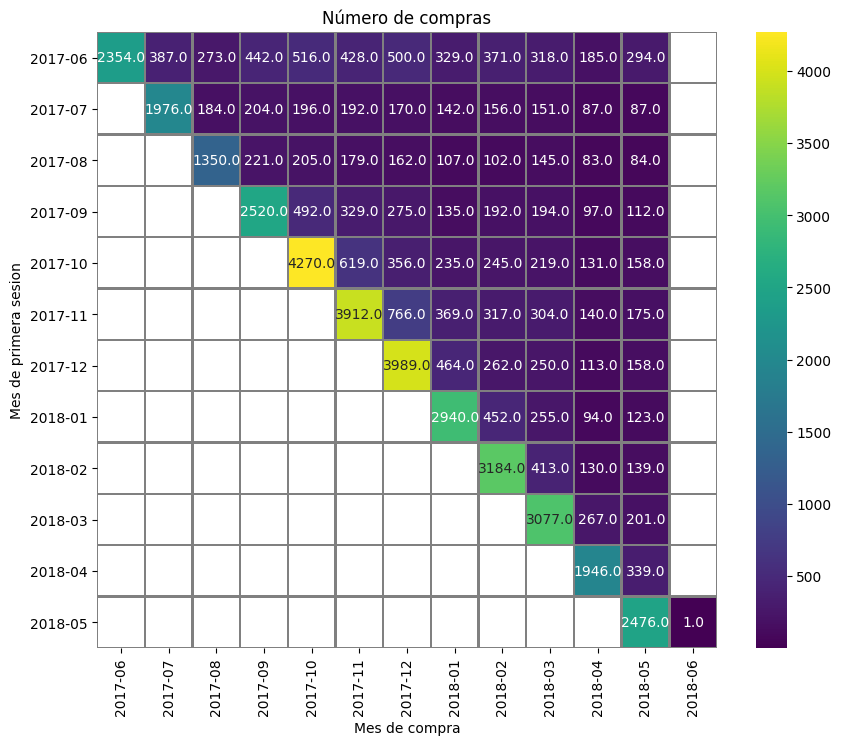

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_monthly_purchase, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('Número de compras')
plt.xlabel('Mes de compra')
plt.ylabel('Mes de primera sesion')
plt.show()

#### Conclusión

Octubre, Noviembre y Diciembre de 2017 son los ganadores una vez más, con la mejor actuación en su primer mes. 
    
Los siguientes Enero, Febrero y Marzo siguen siendo fuertes, pero luego disminuyen en un tercio en abril. Ninguna cohorte logra una actuación tan significativa como la del primer mes, la caída es pronunciada y luego disminuye gradualmente cada mes. La magia sucede principalmente ese primer mes.

## ¿Cuál es el tamaño promedio de compra?

In [46]:
orders_grouped_by_cohorts = purchase_data.groupby(['first_session_month', 'buy_ts_month']).agg({'revenue': 'sum', 'uid': 'count'})

orders_grouped_by_cohorts.head()

revenue   uid
first_session_month buy_ts_month               
2017-06             2017-06       9557.49  2354
                    2017-07       2664.58   387
                    2017-08       1464.69   273
                    2017-09       3882.09   442
                    2017-10       3940.59   516

In [47]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_session_month buy_ts_month                                 
2017-06             2017-06       9557.49  2354          4.060106
                    2017-07       2664.58   387          6.885220
                    2017-08       1464.69   273          5.365165
                    2017-09       3882.09   442          8.783009
                    2017-10       3940.59   516          7.636802

In [48]:
cohort_avg_revenue = orders_grouped_by_cohorts.pivot_table(index='first_session_month', columns='buy_ts_month', values='revenue_per_user', aggfunc='mean')

cohort_avg_revenue

buy_ts_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
first_session_month,,,,,,,,,,,,,
2017-06,4.060106,6.885220,5.365165,8.783009,7.636802,6.599252,6.979900,6.902158,6.247736,10.948553,11.913568,6.557177,NaN
2017-07,NaN,4.997414,5.756957,5.435784,5.015102,4.411406,4.694588,4.140845,4.937821,4.798146,6.793448,5.369655,NaN
2017-08,NaN,NaN,4.618378,4.512760,4.884634,5.286089,5.000247,4.980374,4.771078,8.594690,10.007711,4.472857,NaN
2017-09,NaN,NaN,NaN,4.903651,7.521301,6.415289,37.959745,9.544296,9.948177,4.983711,5.065773,3.737232,NaN
2017-10,NaN,NaN,NaN,NaN,4.300309,6.154814,3.727584,4.502340,4.259061,4.667534,4.419160,4.151266,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,4.225918,3.482480,3.639160,4.320284,3.647171,5.054500,3.992000,NaN
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,4.225871,3.747909,16.024046,20.495280,12.898850,11.279304,NaN
2018-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.604425,4.317920,4.567686,3.254043,4.288374,NaN
2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.615776,4.804988,5.101462,6.482086,NaN


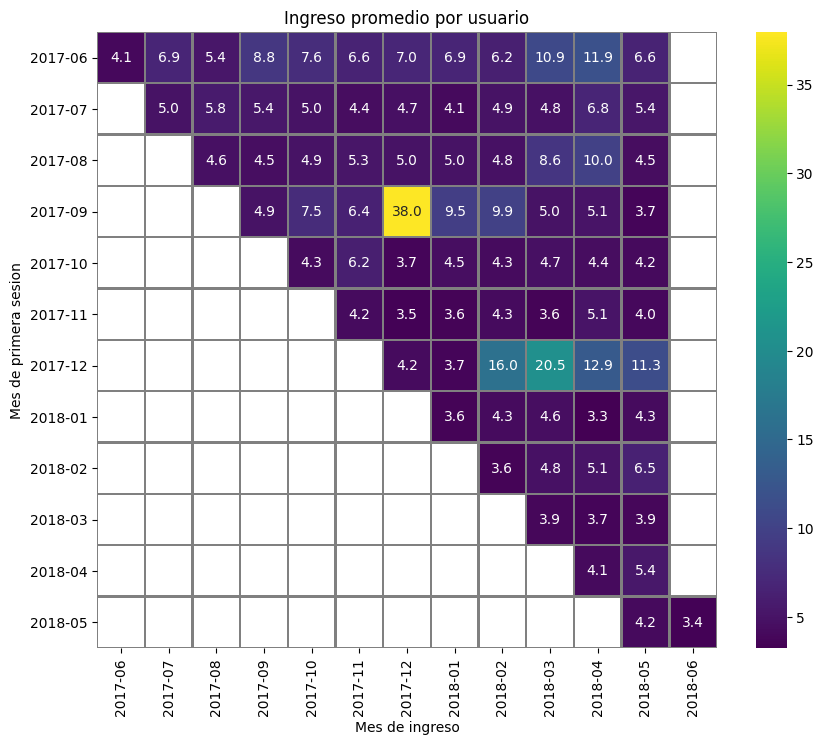

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_avg_revenue, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('Ingreso promedio por usuario')
plt.xlabel('Mes de ingreso')
plt.ylabel('Mes de primera sesion')
plt.show()

#### Conclusión
    
Como puede verse, independientemente de la cohorte, la mayoría de los valores de ingresos promedio se mantuvieron por debajo de 10. Tres cohortes que fueron un poco más altas fueron la primera, junio de 2017, luego septiembre de 2017 y diciembre de 2017. Quizás tuvimos a más de unos pocos usuarios que compraron en cantidades grandes

## ¿Cuánto dinero traen? (LTV)

In [50]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
#orders_grouped_by_cohorts['buy_ts_month'] = orders_grouped_by_cohorts['buy_ts_month'].dt.start_time
#orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.start_time

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['buy_ts_month'].astype('int64') - orders_grouped_by_cohorts['first_session_month'].astype('int64')

orders_grouped_by_cohorts.head()

,first_session_month,buy_ts_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06,2017-06,9557.49,2354,4.060106,0
1,2017-06,2017-07,2664.58,387,6.885220,1
2,2017-06,2017-08,1464.69,273,5.365165,2
3,2017-06,2017-09,3882.09,442,8.783009,3
4,2017-06,2017-10,3940.59,516,7.636802,4


In [51]:
cohort_revenue = purchase_data.groupby(['first_session_month', 'buy_ts_month']).agg({'revenue': 'sum'}).reset_index()
cohort_revenue.head()

,first_session_month,buy_ts_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,2664.58
2,2017-06,2017-08,1464.69
3,2017-06,2017-09,3882.09
4,2017-06,2017-10,3940.59


In [52]:
cohort_users = purchase_data.groupby(['first_session_month', 'buy_ts_month']).agg({'uid': 'nunique'}).reset_index()
cohort_users

,first_session_month,buy_ts_month,uid
0,2017-06,2017-06,2023
1,2017-06,2017-07,231
2,2017-06,2017-08,129
3,2017-06,2017-09,188
4,2017-06,2017-10,257
...,...,...,...
74,2018-03,2018-05,90
75,2018-04,2018-04,1763
76,2018-04,2018-05,174
77,2018-05,2018-05,2315


In [53]:
report = pd.merge(cohort_revenue, cohort_users, on=['first_session_month', 'buy_ts_month'])
report.head()

,first_session_month,buy_ts_month,revenue,uid
0,2017-06,2017-06,9557.49,2023
1,2017-06,2017-07,2664.58,231
2,2017-06,2017-08,1464.69,129
3,2017-06,2017-09,3882.09,188
4,2017-06,2017-10,3940.59,257


In [54]:
margin_rate = 0.5
report['gp'] = report['revenue'] * margin_rate
report['age'] = report['buy_ts_month'].astype('int64') - report['first_session_month'].astype('int64')
report['ltv'] = report['gp'] / report['uid']
report.head()

,first_session_month,buy_ts_month,revenue,uid,gp,age,ltv
0,2017-06,2017-06,9557.49,2023,4778.745,0,2.362207
1,2017-06,2017-07,2664.58,231,1332.290,1,5.767489
2,2017-06,2017-08,1464.69,129,732.345,2,5.677093
3,2017-06,2017-09,3882.09,188,1941.045,3,10.324707
4,2017-06,2017-10,3940.59,257,1970.295,4,7.666518


In [55]:
output = report.pivot_table(index='first_session_month', columns='age', values='ltv', aggfunc='sum')
output.fillna('')
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,2.36,8.13,13.81,24.13,31.80,38.75,47.99,55.31,62.05,73.21,82.88,88.65
2017-07,2.82,6.74,10.46,13.65,16.42,19.42,21.83,24.84,27.99,32.09,35.21,NaN
2017-08,2.58,5.78,9.41,13.45,17.38,20.89,24.09,31.33,39.17,42.41,NaN,NaN
2017-09,2.74,7.81,12.19,41.51,47.31,54.13,57.59,61.15,63.40,NaN,NaN,NaN
2017-10,2.44,6.44,8.72,11.40,14.04,16.92,19.42,22.08,NaN,NaN,NaN,NaN
2017-11,2.46,4.86,7.41,11.16,13.91,17.16,19.87,NaN,NaN,NaN,NaN,NaN
2017-12,2.41,5.05,16.16,29.86,38.23,45.42,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,2.00,5.05,8.38,10.32,13.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,2.02,5.55,8.90,13.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


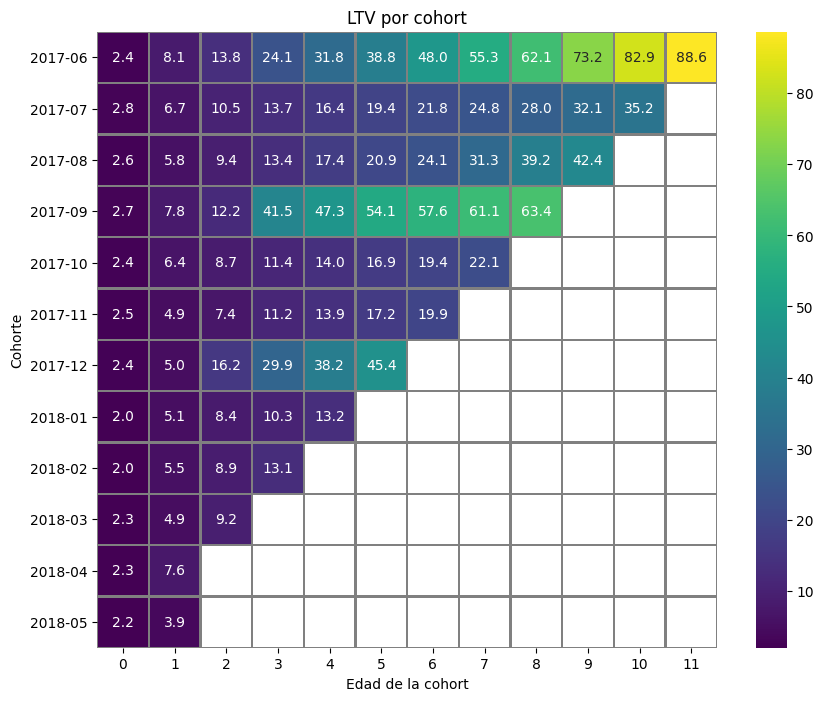

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('LTV por cohort')
plt.xlabel('Edad de la cohort')
plt.ylabel('Cohorte')
plt.show()

#### Conclusión
    
1. La primera cohorte tuvo el valor de vida útil más alto 
  La primera cohorte de clientes adquiridos por la empresa tuvo un valor de vida útil más alto en comparación con las cohortes posteriores.
    
2. Septiembre 2017 y diciembre 2017 tuvieron valores más altos
Estas dos cohortes tuvieron valores de vida útil más altos, lo que indica que los clientes adquiridos durante estos períodos fueron más valiosos para la empresa.
    
3. 2018 tuvo valores consistentemente más bajos que 2017
  Esto implica que la estrategia de adquisición de clientes de la empresa o las condiciones del mercado pueden haber cambiado en 2018, lo que llevó a valores de vida útil más bajos para los clientes adquiridos durante ese año.
    
Estas conclusiones pueden ser útiles para que la empresa refine su estrategia de adquisición de clientes, identifique áreas de mejora y optimice sus esfuerzos de marketing para atraer a clientes de mayor valor.

## Marketing:
 
Tenemos la siguietnes preguntas para determinar los gastos e ingresos del departamento de marketing:

1. ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
3. ¿Cuán rentables eran las inversiones? (ROMI)

## ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [57]:
costs['purchase_month'] = pd.to_datetime(costs['date']).dt.to_period('M')
costs_total = costs.pivot_table(index='purchase_month',columns='source_id', values='costs', aggfunc='sum')

costs_total

source_id,1,2,3,4,5,9,10
purchase_month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


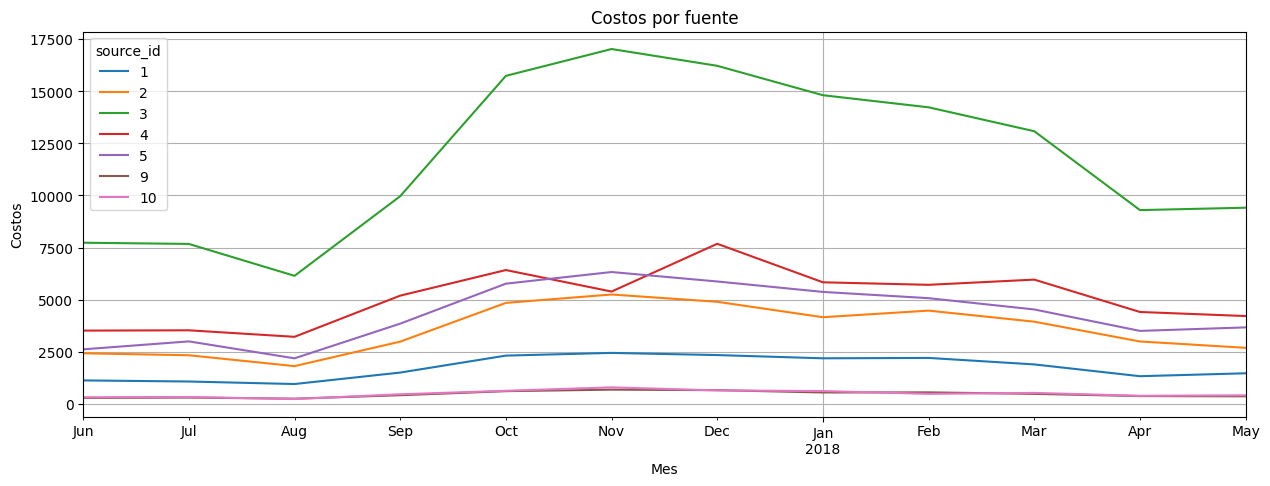

In [58]:
costs_total.plot(figsize=(15, 5), grid=True)
plt.title('Costos por fuente')
plt.xlabel('Mes')
plt.ylabel('Costos')
plt.show()

#### Conclusión
    
La fuente de anuncios que incurrió en el mayor costo fue la fuente 3, seguida de números similares en la 5 y la 4, luego la 2, la 1, y finalmente la 10 y la 9.

## ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [59]:
visits_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()
orders_src = purchase_data
orders_src = orders.merge(visits_source, on='uid', how='left')
orders_src

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3


In [60]:
source_revenue = orders_src.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
source_revenue

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


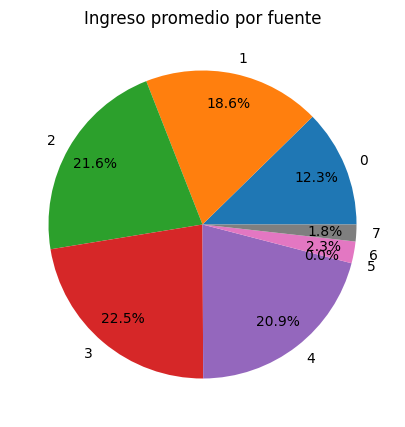

In [61]:
source_revenue.plot.pie(y='revenue', figsize=(10, 5), autopct='%1.1f%%', legend=False, pctdistance=0.8)
plt.title('Ingreso promedio por fuente')
plt.ylabel('')
plt.show()

In [62]:
orders_source = purchase_data
orders_source = orders_source.merge(visits_source, on='uid', how='left')
orders_source

,uid,first_session_date,first_order_date,days_to_convertion,convertion_bracket,first_session_month,buy_ts,revenue,buy_ts_month,source_id
0,313578113262317,2017-09-18,2018-01-03,107.0,+30d,2017-09,2018-01-03 21:51:00,0.55,2018-01,2
1,1575281904278712,2017-06-03,2017-06-03,0.0,0d,2017-06,2017-06-03 10:13:00,1.22,2017-06,10
2,1575281904278712,2017-06-03,2017-06-03,0.0,0d,2017-06,2017-06-03 17:39:00,1.83,2017-06,10
3,2429014661409475,2017-10-11,2017-10-11,0.0,0d,2017-10,2017-10-11 18:33:00,73.33,2017-10,3
4,2464366381792757,2018-01-27,2018-01-28,1.0,1-7d,2018-01,2018-01-28 15:54:00,2.44,2018-01,5
...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22,2017-09-22,0.0,0d,2017-09,2017-09-24 23:48:00,0.24,2017-09,3
50411,18445407535914413204,2017-09-22,2017-09-22,0.0,0d,2017-09,2017-09-25 15:56:00,0.12,2017-09,3
50412,18445601152732270159,2017-08-07,2018-03-26,231.0,+30d,2017-08,2018-03-26 22:54:00,4.22,2018-03,2
50413,18446156210226471712,2017-11-07,2018-02-18,103.0,+30d,2017-11,2018-02-18 19:34:00,9.78,2018-02,3


In [63]:
orders_source['first_order_date'] = orders_source['first_order_date'].astype('datetime64[ns]')
buyers_source = orders_source.groupby(['source_id', 'first_order_date']).agg({'uid':'nunique'}).\
                rename(columns={'uid':'n_buyers'}).reset_index()
buyers_source.head()

,source_id,first_order_date,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [64]:
cac_source_table = buyers_source.merge(costs, 
                                       left_on = ['source_id', 'first_order_date'],
                                       right_on = ['source_id', 'date'])
cac_source_table['cac_source'] = cac_source_table['costs'] / cac_source_table['n_buyers']
cac_pivot_source = cac_source_table.pivot_table(index='purchase_month', 
                                                columns='source_id', 
                                                values='cac_source', 
                                                aggfunc='mean')

cac_pivot_source

source_id,1,2,3,4,5,9,10
purchase_month,,,,,,,
2017-06,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


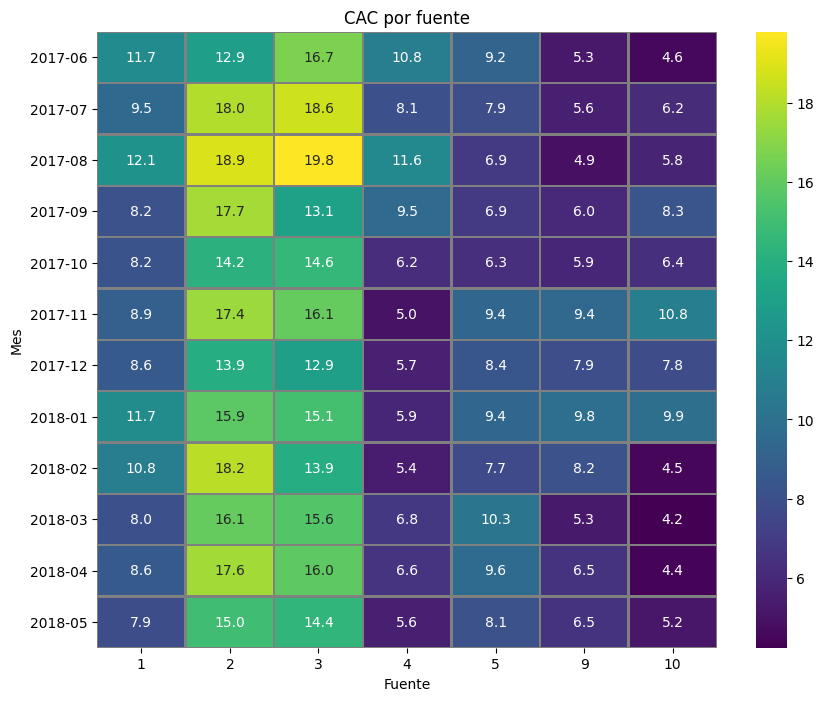

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(cac_pivot_source, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('CAC por fuente')
plt.xlabel('Fuente')
plt.ylabel('Mes')
plt.show()

#### Conclusión

Las fuentes de anuncios 2 y 3 alternan tener el costo de adquisición del cliente (CAC) más alto, seguidas de la fuente 1. Las fuentes 4, 9 y 10 alternan tener el CAC más bajo.

## ¿Cuán rentables eran las inversiones? (ROMI)

In [66]:
cac_month = cac_pivot_source.mean(axis=1).reset_index().rename(columns={0: 'cac'})
report = report.merge(cac_month, left_on='first_session_month', right_on='purchase_month')
report.head()

,first_session_month,buy_ts_month,revenue,uid,gp,age,ltv,purchase_month,cac
0,2017-06,2017-06,9557.49,2023,4778.745,0,2.362207,2017-06,10.16105
1,2017-06,2017-07,2664.58,231,1332.290,1,5.767489,2017-06,10.16105
2,2017-06,2017-08,1464.69,129,732.345,2,5.677093,2017-06,10.16105
3,2017-06,2017-09,3882.09,188,1941.045,3,10.324707,2017-06,10.16105
4,2017-06,2017-10,3940.59,257,1970.295,4,7.666518,2017-06,10.16105


In [67]:
report['romi'] = report['ltv'] / report['cac']
report

,first_session_month,buy_ts_month,revenue,uid,gp,age,ltv,purchase_month,cac,romi
0,2017-06,2017-06,9557.49,2023,4778.745,0,2.362207,2017-06,10.161050,0.232477
1,2017-06,2017-07,2664.58,231,1332.290,1,5.767489,2017-06,10.161050,0.567608
2,2017-06,2017-08,1464.69,129,732.345,2,5.677093,2017-06,10.161050,0.558711
3,2017-06,2017-09,3882.09,188,1941.045,3,10.324707,2017-06,10.161050,1.016106
4,2017-06,2017-10,3940.59,257,1970.295,4,7.666518,2017-06,10.161050,0.754501
...,...,...,...,...,...,...,...,...,...,...
74,2018-03,2018-05,774.77,90,387.385,2,4.304278,2018-03,9.473903,0.454330
75,2018-04,2018-04,8043.82,1763,4021.910,0,2.281288,2018-04,9.896862,0.230506
76,2018-04,2018-05,1838.73,174,919.365,1,5.283707,2018-04,9.896862,0.533877
77,2018-05,2018-05,10368.11,2315,5184.055,0,2.239333,2018-05,8.956894,0.250012


In [68]:
romi_output = report.pivot_table(index='first_session_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)
romi_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,0.23,0.80,1.36,2.37,3.13,3.81,4.72,5.44,6.11,7.20,8.16,8.72
2017-07,0.27,0.64,0.99,1.29,1.56,1.84,2.07,2.36,2.65,3.04,3.34,NaN
2017-08,0.23,0.51,0.82,1.18,1.52,1.83,2.11,2.74,3.43,3.71,NaN,NaN
2017-09,0.28,0.78,1.22,4.17,4.75,5.44,5.79,6.14,6.37,NaN,NaN,NaN
2017-10,0.28,0.73,0.99,1.29,1.59,1.92,2.20,2.50,NaN,NaN,NaN,NaN
2017-11,0.22,0.44,0.67,1.01,1.26,1.56,1.81,NaN,NaN,NaN,NaN,NaN
2017-12,0.26,0.54,1.74,3.21,4.11,4.88,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.18,0.46,0.76,0.93,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.21,0.57,0.91,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


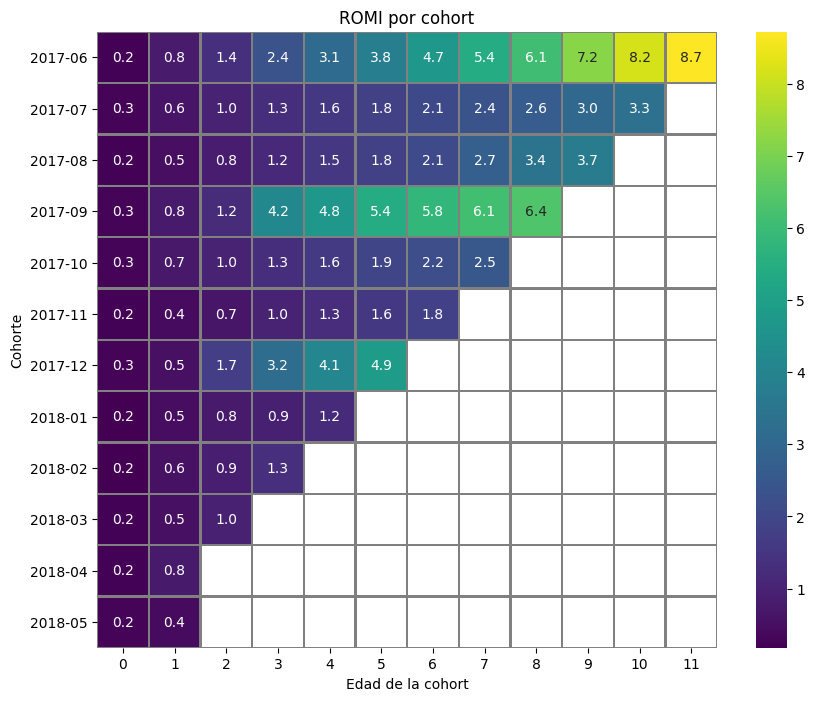

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(romi_output, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title('ROMI por cohort')
plt.xlabel('Edad de la cohort')
plt.ylabel('Cohorte')
plt.show()

In [70]:
# Primera visita usuarios
first_visit_users = (
    visits[['uid','start_ts','source_id']]
    .sort_values(by='start_ts',ascending=True)
    .groupby('uid',as_index=False)
    .first()
)

# Mes de primera visita usuarios
first_visit_users['first_visit_month'] = first_visit_users['start_ts'].astype('datetime64[M]')

# Primera orden usuarios
first_order_users = (
    orders[['uid','buy_ts']]
    .sort_values(by='buy_ts',ascending=True)
    .groupby('uid',as_index=False)
    .first()
)

# Mes de primera orden usuarios
first_order_users['first_order_month'] = first_order_users['buy_ts'].astype('datetime64[M]')

# Seleccionar columnas a usar de visitas
first_visit_users = first_visit_users[['uid','source_id','first_visit_month']]

# Unir data de primera orden a dataframe orders
orders = pd.merge(orders,first_order_users[['first_order_month','uid']],on='uid')

# Obtener mes de compra
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Seleccionar columnas a usar de ordenes
buyers = orders[['uid', 'buy_ts', 'first_order_month','revenue','order_month']]

# Unir data de ordenes con data de visitas
buyers = pd.merge(buyers,first_visit_users,on='uid')

# Generar columna de mes en los costos
costs['month'] = costs['date'].astype('datetime64[M]')

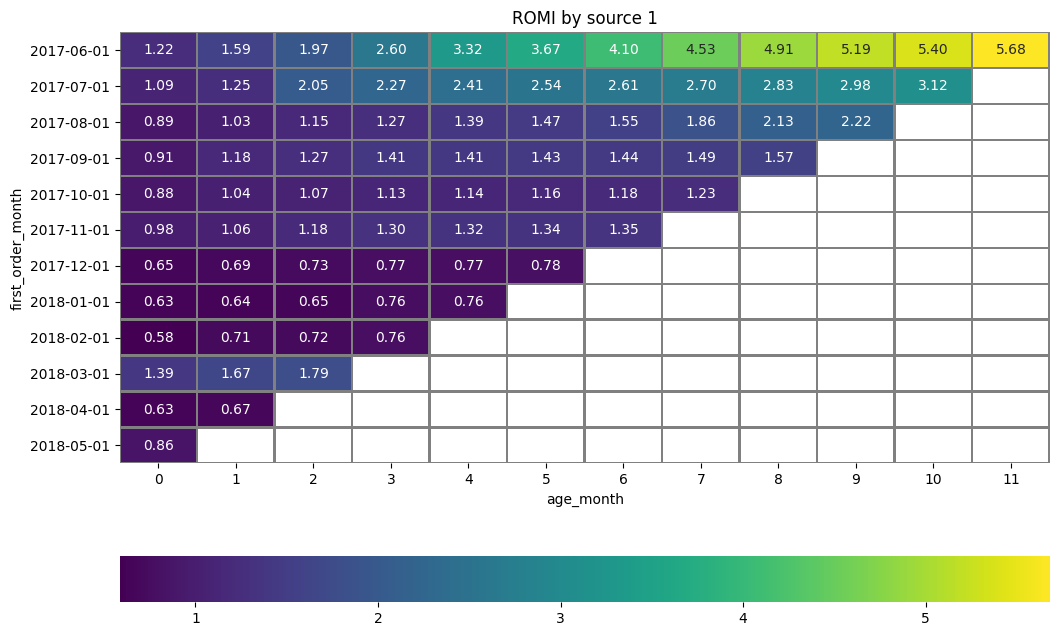

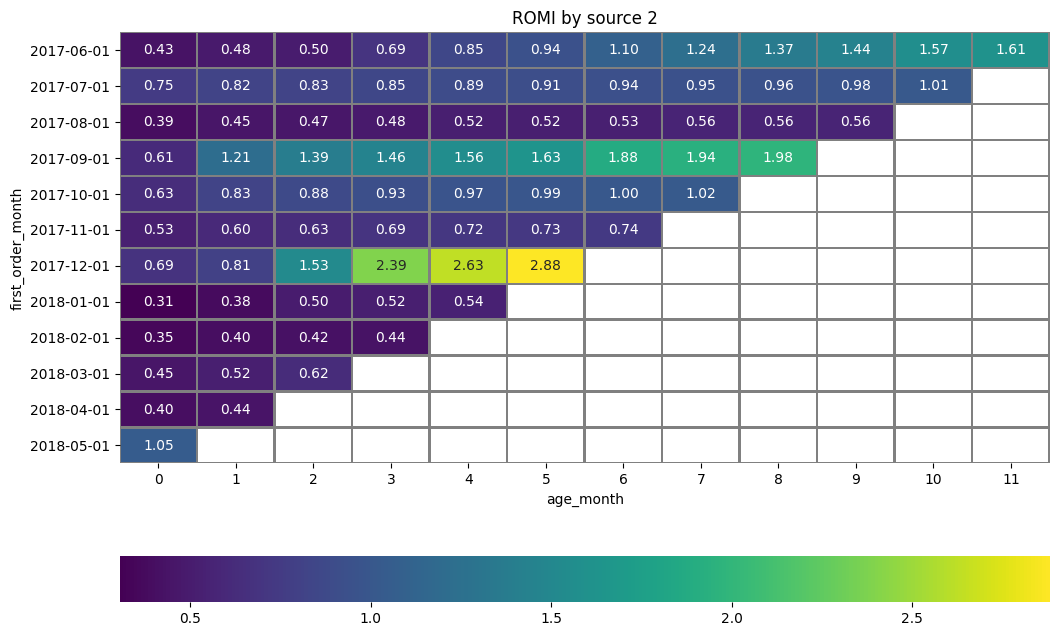

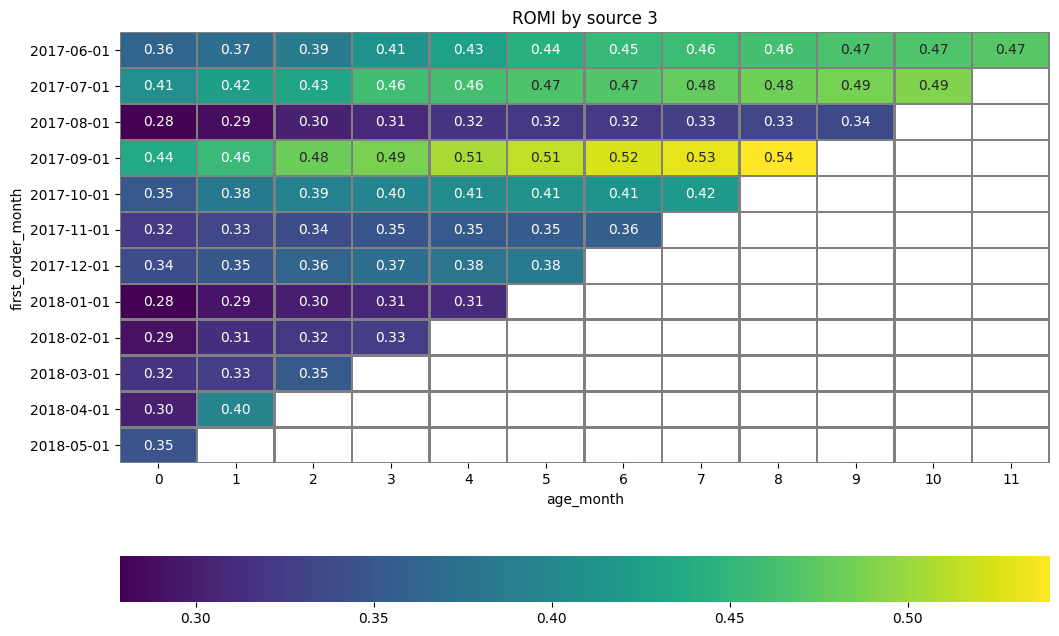

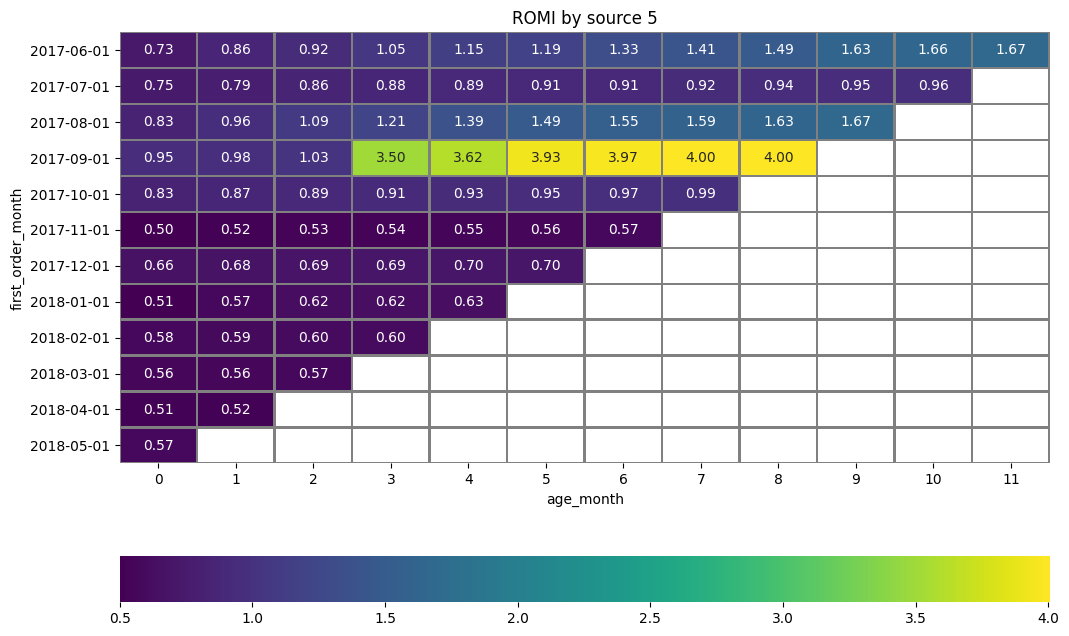

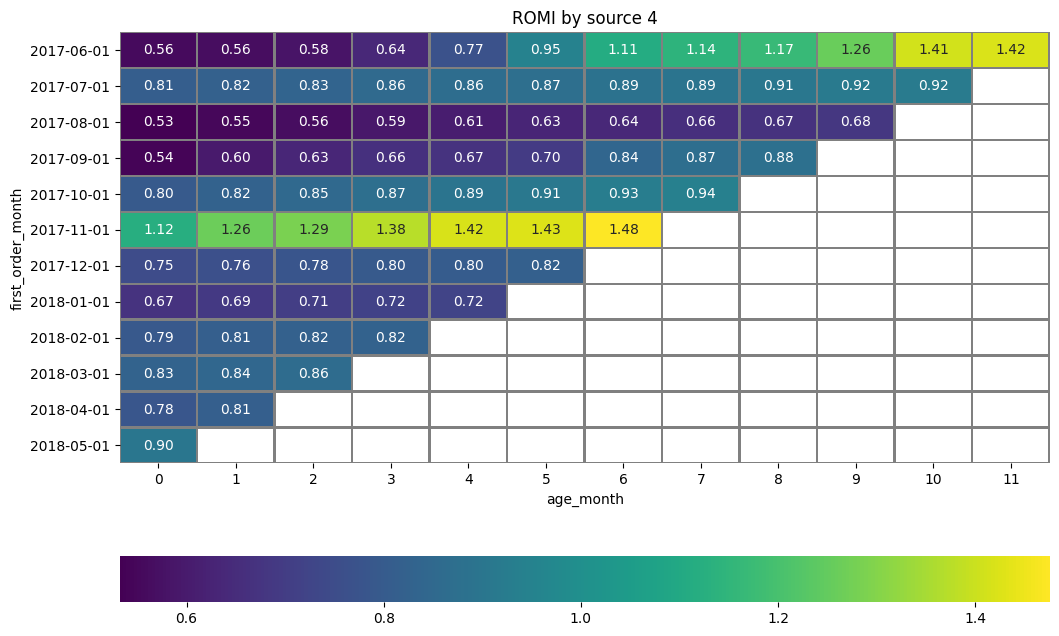

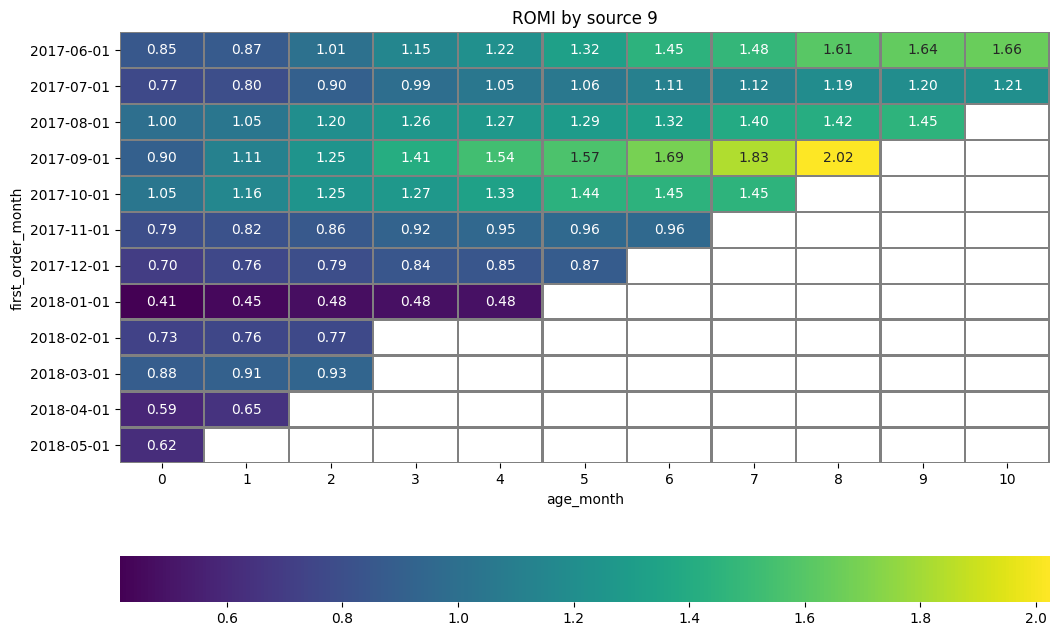

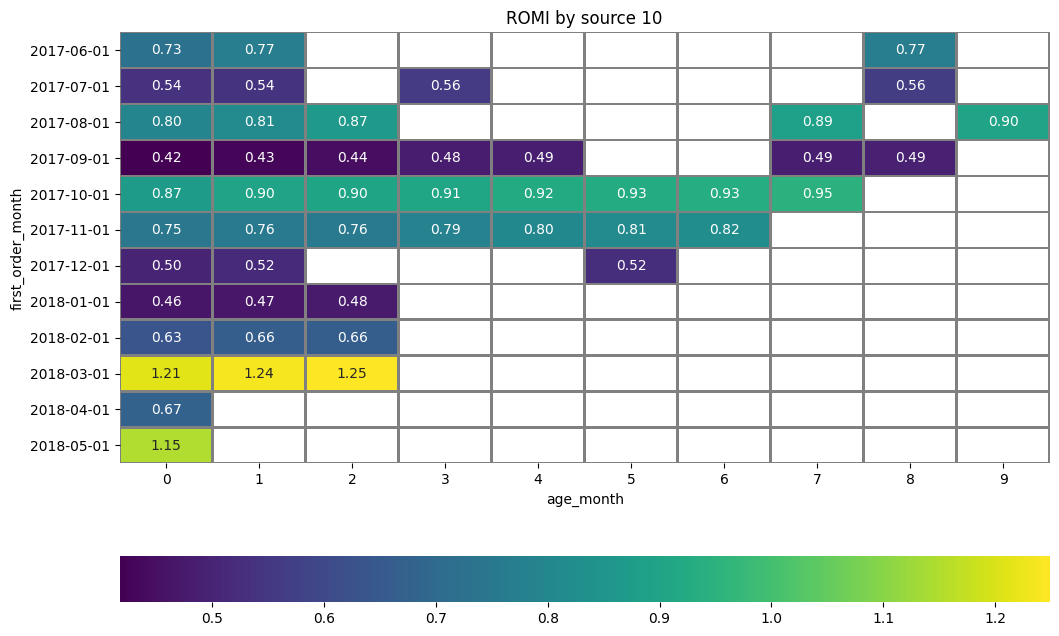

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [71]:
def calculate_and_plot_romi(buyers, costs, source_id):
    # Seleccionar una source
    buyers_source = buyers[buyers['source_id'] == source_id]
    costs_source = costs[costs['source_id'] == source_id]

    # Obtener revenue mensual por cohorte
    cohorts_revenue_month = (
        buyers_source
        .groupby(['first_order_month', 'order_month'])
        .agg({'revenue': 'sum'})
        .reset_index()
    )

    # Obtener edad de compras de cada cohorte
    cohorts_revenue_month['age_month'] = (
        (pd.to_datetime(cohorts_revenue_month['order_month']) 
         - pd.to_datetime(cohorts_revenue_month['first_order_month']))
        /np.timedelta64(1,'M')
    ).round().astype(int)

    # Obtener tamaño de cohortes
    cohort_sizes = (
        buyers_source
        .groupby('first_order_month')
        .agg({'uid': 'nunique'})
        .reset_index()
        .rename(columns={'uid': 'n_buyers'})
    )

    # Juntar data de tamaño cohortes y revenue cohortes
    cohorts_report = pd.merge(cohort_sizes, cohorts_revenue_month, on='first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

    # Obtener costos mensuales de la source
    monthly_costs = (
        costs_source
        .groupby(['month'])
        .agg({'costs':'sum'})
        .reset_index()
    )

    # Juntar costos a reporte cohorte
    cohorts_report = pd.merge(cohorts_report,
                              monthly_costs,
                              left_on='first_order_month',
                              right_on='month'
                             ) 
    cohorts_report.drop(['month'], axis=1, inplace=True)

    # Calculo cac y romi
    cohorts_report['cac'] = cohorts_report['costs'] / cohorts_report['n_buyers']
    cohorts_report['romi'] = cohorts_report['rev_per_buyer'] / cohorts_report['cac']

    # Reporte final
    romi = (
        cohorts_report
        .pivot_table(index='first_order_month', columns='age_month', values='romi', aggfunc='mean')
        .cumsum(axis=1)
    )

    romi.index = romi.index.astype(str)
    plt.figure(figsize=(12, 8))
    sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cmap='viridis', cbar_kws={'orientation': 'horizontal'})
    plt.title('ROMI by source {}'.format(source_id))
    plt.show()

# Ejemplo de uso:
# Suponiendo que tienes varios source_id en tus datos de buyers y costs
unique_source_ids = buyers['source_id'].unique()  # Obtener todos los source_id únicos

for source_id in unique_source_ids:
    calculate_and_plot_romi(buyers, costs, source_id)

# Conclusion final

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Anteriormente, examiné el Valor del Cliente a lo Largo del Tiempo (LTV) y el Costo de Adquisición del Cliente (CAC) por cohorte, así que vamos a echar un vistazo más cercano a la fuente de anuncios para marketing

In [72]:
orders_source['revenue'] = orders_source['revenue'].astype('float32')
costs['costs'] = costs['costs'].astype('float32')

source_revenue_total = orders_source.pivot_table(values='revenue', index='source_id', aggfunc='sum').round()
source_revenue_total.reset_index(inplace=True)

source_costs_total = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').round()
source_costs_total.reset_index(inplace=True)

source_costs_total

,source_id,costs
0,1,20833.0
1,2,42806.0
2,3,141322.0
3,4,61074.0
4,5,51757.0
5,9,5517.0
6,10,5822.0


In [73]:
source_compare = source_revenue_total.merge(source_costs_total, on='source_id')
source_compare.columns = ['source_id', 'total_revenue', 'total_marketing_costs']

source_compare['ROMI'] = (source_compare['total_revenue'] - source_compare['total_marketing_costs']) / source_compare['total_marketing_costs']
source_compare.sort_values(by='ROMI', ascending=False)

,source_id,total_revenue,total_marketing_costs,ROMI
0,1,31091.0,20833.0,0.492392
1,2,46924.0,42806.0,0.096201
5,9,5759.0,5517.0,0.043864
4,5,52624.0,51757.0,0.016751
3,4,56697.0,61074.0,-0.071667
6,10,4450.0,5822.0,-0.235658
2,3,54511.0,141322.0,-0.614278


Al investigar de cerca el retorno de la inversión, el modelo de negocio actual no es sostenible, ya que ningún grupo devolvió una ganancia después de pagar su costo de adquisición.

Si el proyecto tiene como objetivo obtener retornos futuros, le aconsejaría al equipo de marketing que incremente sus inversiones en fuentes 1, 2 y 9. Además, deberían considerar disminuir el gasto en fuentes 3, 10, 4 y 5. De hecho, los costos de marketing totales para la fuente 1 son mucho más bajos que los de la fuente 3, y la fuente 3 tiene el ROMI más bajo, por lo que recomendaría eliminar la fuente 3 a favor de la fuente 1. De hecho, probablemente recomendaría que transfieran el gasto de las 4 fuentes inferiores en la gráfica anterior a las 4 superiores, tal vez en fases para graficar el efecto. Quizás al enfocarnos solo en nuestras 4 fuentes principales por ROI, podríamos aumentar nuestros ingresos mientras disminuimos nuestros costos.